**1.KEY**


In [ ]:
import os
import subprocess
import librosa
import json


raw_dir = '/content/dataset'
processed_dir = '/content/processed'


# Create necessary directories
os.makedirs(processed_dir, exist_ok=True)


# Convert MP3/M4A to 16-bit WAV format with 32 kHz sample rate
for file in os.listdir(raw_dir):
    if file.endswith(('.mp3', '.m4a')):
        input_path = os.path.join(raw_dir, file)
        output_path = os.path.join(processed_dir, os.path.splitext(file)[0] + '.wav')
        subprocess.run(['ffmpeg', '-i', input_path, '-ar', '32000', '-acodec', 'pcm_s16le', output_path])





In [ ]:
# for key

In [ ]:
#whole directory

In [ ]:
import os
import librosa
import numpy as np

# Define the directory containing the .wav files
directory_path = "/content/processed"  # Replace with your directory path

# List to store results
results = []

# Iterate through all files in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(directory_path, file_name)
        print(f"Processing: {file_name}")

        # Load the audio file
        y, sr = librosa.load(file_path)

        # Extract chroma features
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

        # Key detection logic
        key_tonalities = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
        major_keys = [f"{key} major" for key in key_tonalities]
        minor_keys = [f"{key} minor" for key in key_tonalities]
        all_keys = major_keys + minor_keys

        major_profile = librosa.feature.chroma_cens(y=y, sr=sr).mean(axis=1)
        minor_profile = librosa.feature.chroma_cens(y=y, sr=sr).mean(axis=1)
        key_strengths = np.concatenate([major_profile, minor_profile])

        detected_key = all_keys[np.argmax(key_strengths)]
        results.append((file_name, detected_key))

# Print all results
print("\nDetected Keys for Files:")
for file, key in results:
    print(f"{file}: {key}")


Processing: key23.wav
Processing: key24.wav
Processing: key16.wav
Processing: the-infinity-120-bpm-d-major-13108.wav
Processing: key03.wav
Processing: key20.wav
Processing: the-infinity-90-bpm-d-major-13111.wav
Processing: key17.wav
Processing: minor-moods-long-version-119272.wav
Processing: key21.wav
Processing: key07.wav
Processing: key02.wav
Processing: key01.wav
Processing: key13.wav
Processing: key14.wav
Processing: key09.wav
Processing: key12.wav
Processing: classic-piano-loop-in-a-minor-5004.wav
Processing: key10.wav
Processing: key04.wav
Processing: key15.wav
Processing: key06.wav
Processing: key22.wav
Processing: key05.wav
Processing: classic-piano-loop-in-d-major-5005.wav
Processing: key11.wav
Processing: key08.wav
Processing: sonata-in-c-major-mozart-216757.wav
Processing: key19.wav
Processing: key18.wav

Detected Keys for Files:
key23.wav: D# major
key24.wav: E major
key16.wav: G# major
the-infinity-120-bpm-d-major-13108.wav: D major
key03.wav: G major
key20.wav: C major
th

In [ ]:
import os
from essentia.standard import MonoLoader, KeyExtractor

# Define the directory containing the .wav files
directory_path = "/content/processed"  # Replace with your directory path

# List to store results
results = []

# Iterate through all files in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith(".wav"):
        file_path = os.path.join(directory_path, file_name)
        print(f"Processing: {file_name}")

        # Load the audio file
        loader = MonoLoader(filename=file_path)
        audio = loader()

        # Detect the key
        key_extractor = KeyExtractor()
        key, scale, strength = key_extractor(audio)

        # Append the result
        results.append((file_name, key, scale, strength))

# Print all results
print("\nDetected Keys for Files:")
for file, key, scale, strength in results:
    print(f"{file}: {key} {scale} (Strength: {strength:.2f})")


Processing: key23.wav
Processing: key24.wav
Processing: key16.wav
Processing: the-infinity-120-bpm-d-major-13108.wav
Processing: key03.wav
Processing: key20.wav
Processing: the-infinity-90-bpm-d-major-13111.wav
Processing: key17.wav
Processing: minor-moods-long-version-119272.wav
Processing: key21.wav
Processing: key07.wav
Processing: key02.wav
Processing: key01.wav
Processing: key13.wav
Processing: key14.wav
Processing: key09.wav
Processing: key12.wav
Processing: classic-piano-loop-in-a-minor-5004.wav
Processing: key10.wav
Processing: key04.wav
Processing: key15.wav
Processing: key06.wav
Processing: key22.wav
Processing: key05.wav
Processing: classic-piano-loop-in-d-major-5005.wav
Processing: key11.wav
Processing: key08.wav
Processing: sonata-in-c-major-mozart-216757.wav
Processing: key19.wav
Processing: key18.wav

Detected Keys for Files:
key23.wav: Eb major (Strength: 0.76)
key24.wav: E minor (Strength: 0.65)
key16.wav: Ab major (Strength: 0.85)
the-infinity-120-bpm-d-major-13108.wa

2.TEMPO(BPM)

In [ ]:
import os
import subprocess
import librosa
import json


raw_dir = '/content/dataset2'
processed_dir = '/content/processed2'


# Create necessary directories
os.makedirs(processed_dir, exist_ok=True)


# Convert MP3/M4A to 16-bit WAV format with 32 kHz sample rate
for file in os.listdir(raw_dir):
    if file.endswith(('.mp3', '.m4a')):
        input_path = os.path.join(raw_dir, file)
        output_path = os.path.join(processed_dir, os.path.splitext(file)[0] + '.wav')
        subprocess.run(['ffmpeg', '-i', input_path, '-ar', '32000', '-acodec', 'pcm_s16le', output_path])





In [ ]:
# Step 1: Install Essentia
!pip install essentia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 101.3 MB/s eta 0:00:00


In [ ]:
import librosa
import os

# Define the directory path
directory_path = '/content/processed2'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.wav') or filename.endswith('.mp3'):
        # Full path of the audio file
        audio_path = os.path.join(directory_path, filename)

        # Load the audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Extract tempo (BPM)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

        # Print the result for each file
        print(f"{filename}: Estimated Tempo: {tempo} BPM")


mattina-presto-happy-sweet-joy-175621.wav: Estimated Tempo: [138.88888889] BPM
the-infinity-120-bpm-d-major-13108.wav: Estimated Tempo: [120.96774194] BPM
please-calm-my-mind-125566.wav: Estimated Tempo: [101.35135135] BPM
the-infinity-90-bpm-d-major-13111.wav: Estimated Tempo: [89.28571429] BPM
200 bpm tempo music (4c58b1cfde534c728e4216eebc1f7652).wav: Estimated Tempo: [197.36842105] BPM
intoxicant-hiphop-fatfox-club-bass-instrumental-181695.wav: Estimated Tempo: [170.45454545] BPM
aviena-160-bpm-201242.wav: Estimated Tempo: [79.78723404] BPM
in-slow-motion-inspiring-ambient-lounge-219592.wav: Estimated Tempo: [113.63636364] BPM
russian-inspired-positive-5382.wav: Estimated Tempo: [113.63636364] BPM


In [ ]:



import os
from essentia.standard import MonoLoader, RhythmExtractor2013

# Define the directory path
directory_path = '/content/processed2'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.wav') or filename.endswith('.mp3'):
        # Full path of the audio file
        audio_path = os.path.join(directory_path, filename)

        # Load the audio file
        audio = MonoLoader(filename=audio_path)()

        # Extract tempo using RhythmExtractor2013
        rhythm_extractor = RhythmExtractor2013(method="multifeature")
        bpm, confidence, _, _, _ = rhythm_extractor(audio)

        # Convert bpm and confidence to scalar (if they are numpy arrays)
        bpm = float(bpm)
        #confidence = float(confidence)

        # Print the result for each file
        print(f"{filename}: Estimated Tempo: {bpm:.2f} BPM")



mattina-presto-happy-sweet-joy-175621.wav: Estimated Tempo: 139.98 BPM
the-infinity-120-bpm-d-major-13108.wav: Estimated Tempo: 119.89 BPM
please-calm-my-mind-125566.wav: Estimated Tempo: 99.98 BPM
the-infinity-90-bpm-d-major-13111.wav: Estimated Tempo: 90.00 BPM
200 bpm tempo music (4c58b1cfde534c728e4216eebc1f7652).wav: Estimated Tempo: 100.08 BPM
intoxicant-hiphop-fatfox-club-bass-instrumental-181695.wav: Estimated Tempo: 83.98 BPM
aviena-160-bpm-201242.wav: Estimated Tempo: 80.01 BPM
in-slow-motion-inspiring-ambient-lounge-219592.wav: Estimated Tempo: 115.00 BPM
russian-inspired-positive-5382.wav: Estimated Tempo: 112.07 BPM


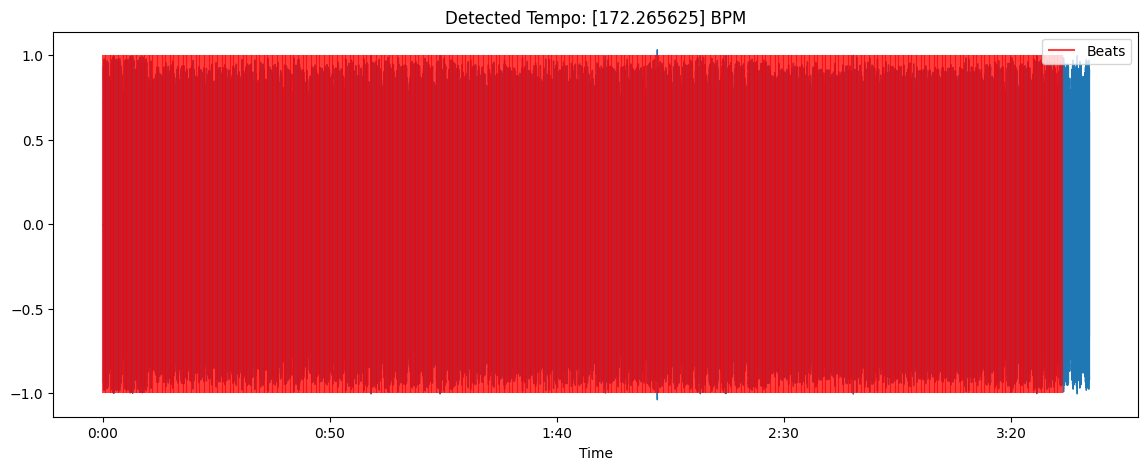

In [ ]:
#crosscheck librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio
audio_path = '/content/processed2/intoxicant-hiphop-fatfox-club-bass-instrumental-181695.wav'
y, sr = librosa.load(audio_path)

# Extract tempo and beats
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beats, sr=sr)

# Plot waveform with beat positions
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.vlines(beat_times, -1, 1, color='r', alpha=0.75, label='Beats')
plt.title(f"Detected Tempo: {tempo} BPM")
plt.legend()
plt.show()


3.COMBINING KEY AND TEMPO

In [ ]:
import os
import json
from essentia.standard import MonoLoader, KeyExtractor, RhythmExtractor2013

# Define the directory containing the audio files
directory_path = "/content/processed"  # Replace with your directory path

# List to store results
results = []

# Iterate through all files in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith(".wav") or file_name.endswith(".mp3"):
        file_path = os.path.join(directory_path, file_name)
        print(f"Processing: {file_name}")

        # Load the audio file
        loader = MonoLoader(filename=file_path)
        audio = loader()

        # Extract the key
        key_extractor = KeyExtractor()
        key, scale, strength = key_extractor(audio)

        # Extract the tempo (BPM)
        rhythm_extractor = RhythmExtractor2013(method="multifeature")
        bpm, confidence, _, _, _ = rhythm_extractor(audio)

        # Convert bpm to scalar (if it's a numpy array)
        bpm = float(bpm)

        # Append the result as a dictionary
        results.append({
            "file_name": file_name,
            "key": key,
            "scale": scale,
            "strength": round(strength, 2),
            "tempo_bpm": round(bpm, 2)
        })

# Print results
print("\nFinal Results in JSON Format:")
print(json.dumps(results, indent=4))

# Optionally save the results to a JSON file
output_path = os.path.join(directory_path, "results.json")
with open(output_path, "w") as json_file:
    json.dump(results, json_file, indent=4)

print(f"\nResults saved to: {output_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/processed'

4.CATEGORIZE

In [ ]:
import json
from collections import defaultdict

def categorize_songs_by_key_and_tempo(json_file_path):
    # Load the JSON file
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    # Initialize dictionaries for grouping
    key_groups = defaultdict(list)
    tempo_groups = defaultdict(list)

    # Define tempo categories
    tempo_categories = [
        ("Largo", 40, 60),
        ("Adagio", 61, 76),
        ("Andante", 77, 108),
        ("Moderato", 109, 120),
        ("Allegro", 121, 168),
        ("Presto", 169, 200),
        ("Prestissimo", 201, float('inf'))
    ]

    # Group songs by keys and tempo
    for song in data:
        # Group by key
        key_groups[song['key']].append(song)

        # Determine tempo category
        tempo_bpm = song['tempo_bpm']
        for category, min_bpm, max_bpm in tempo_categories:
            if min_bpm <= tempo_bpm <= max_bpm:
                tempo_groups[category].append(song)
                break

    # Output results
    categorized_data = {
        "key_groups": key_groups,
        "tempo_groups": tempo_groups
    }

    # Save the categorized data to a new JSON file
    output_file_path = "categorized_songs.json"
    with open(output_file_path, 'w') as outfile:
        json.dump(categorized_data, outfile, indent=4)

    print(f"Categorized data saved to {output_file_path}")

# Example usage
json_file_path = "/content/processed/results.json"
categorize_songs_by_key_and_tempo(json_file_path)


Categorized data saved to categorized_songs.json


RUN FOR ALL FILES TO EXTRACT THE METADATA

In [ ]:
!pip install essentia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 55.9 MB/s eta 0:00:00


In [ ]:
!pip install pydub


In [ ]:
!apt-get update  # Update package list
!apt-get install ffmpeg -y  # Install FFmpeg



Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,469 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,226 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restrict

In [ ]:
'''import os
import json
from pydub import AudioSegment
from essentia.standard import MonoLoader, KeyExtractor, RhythmExtractor2013

# Define Directories
input_directory = "/content/input"  # Replace with your input directory containing .mp3/.mp4 files
processed_directory = "/content/processed"
segments_directory = "/content/segments"
metadata_directory = "/content/metadata"

# Create necessary directories
os.makedirs(processed_directory, exist_ok=True)
os.makedirs(segments_directory, exist_ok=True)
os.makedirs(metadata_directory, exist_ok=True)



def convert_to_wav(input_dir, output_dir):
    for file_name in os.listdir(input_dir):
        if file_name.endswith(('.mp3', '.mp4', '.m4a', '.flac')):
            file_path = os.path.join(input_dir, file_name)
            output_path = os.path.join(output_dir, os.path.splitext(file_name)[0] + ".wav")

            try:
                # Convert to WAV using pydub
                audio = AudioSegment.from_file(file_path)
                audio.export(output_path, format="wav")
                print(f"Converted: {file_name} -> {output_path}")
            except :
                print(f"Error decoding {file_name}. Skipping...")


convert_to_wav(input_directory, processed_directory)

# Step 2: Segment .wav files
def segment_wav_files(input_dir, output_dir, segment_duration=30):
    segment_map = {}
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(input_dir, file_name)
            audio = AudioSegment.from_wav(file_path)

            original_name = os.path.splitext(file_name)[0]
            segment_map[original_name] = []

            # Split into segments
            for i in range(0, len(audio), segment_duration * 1000):
                segment = audio[i:i + segment_duration * 1000]
                segment_file_name = f"{original_name}_segment_{i//1000}.wav"
                segment_path = os.path.join(output_dir, segment_file_name)
                segment.export(segment_path, format="wav")
                segment_map[original_name].append(segment_file_name)
                print(f"Segmented: {file_name} -> {segment_path}")

    return segment_map

segment_map = segment_wav_files(processed_directory, segments_directory)

# Step 3: Extract Key, Scale, and Tempo
def extract_metadata(segment_list, segment_dir):
    results = []

    for segment_name in segment_list:
        file_path = os.path.join(segment_dir, segment_name)
        print(f"Processing: {segment_name}")

        # Load the audio file
        loader = MonoLoader(filename=file_path)
        audio = loader()

        # Extract Key and Scale
        key_extractor = KeyExtractor()
        key, scale, strength = key_extractor(audio)

        # Extract Tempo
        rhythm_extractor = RhythmExtractor2013(method="multifeature")
        bpm, confidence, _, _, _ = rhythm_extractor(audio)
        bpm = float(bpm)

        # Append metadata
        results.append({
            "file_name": segment_name,
            "key": key,
            "scale": scale,
            "strength": round(strength, 2),
            "tempo_bpm": round(bpm, 2)
        })

    return results

# Step 4: Generate Metadata for Each Song
for original_song, segments in segment_map.items():
    song_metadata = extract_metadata(segments, segments_directory)

    # Save Metadata to JSON
    output_json_path = os.path.join(metadata_directory, f"{original_song}.json")
    with open(output_json_path, "w") as json_file:
        json.dump(song_metadata, json_file, indent=4)

    print(f"Metadata saved for {original_song} to {output_json_path}")'''


Converted: Lipstick (feat. Robbie Rise).mp3 -> /content/processed_second/Lipstick (feat. Robbie Rise).wav
Converted: Lets Try It.mp3 -> /content/processed_second/Lets Try It.wav
Converted: Wild.mp3 -> /content/processed_second/Wild.wav
Converted: OoooH.mp3 -> /content/processed_second/OoooH.wav
Converted: Nightmares.mp3 -> /content/processed_second/Nightmares.wav
Converted: Life Of Sin (feat. Ranger Trucco).mp3 -> /content/processed_second/Life Of Sin (feat. Ranger Trucco).wav
Converted: Ordinary Love - Folamour Remix.mp3 -> /content/processed_second/Ordinary Love - Folamour Remix.wav
Converted: Runnin_.mp3 -> /content/processed_second/Runnin_.wav
Converted: Right Here.mp3 -> /content/processed_second/Right Here.wav
Converted: Synopsis.mp3 -> /content/processed_second/Synopsis.wav
Converted: Kerching (feat. Eliza Legzdina).mp3 -> /content/processed_second/Kerching (feat. Eliza Legzdina).wav
Converted: Temperature.mp3 -> /content/processed_second/Temperature.wav
Converted: Scrufizzer).m

GROUPING KEYS

In [ ]:
import os
import json
from pydub import AudioSegment
from essentia.standard import MonoLoader, KeyExtractor, RhythmExtractor2013

# Define Directories
input_directory = "/content/input"  # Replace with your input directory containing .mp3/.mp4 files
processed_directory = "/content/processed"
segments_directory = "/content/segments"
metadata_directory = "/content/metadata"
keys_directory = "/content/keys"

# Create necessary directories
os.makedirs(processed_directory, exist_ok=True)
os.makedirs(segments_directory, exist_ok=True)
os.makedirs(metadata_directory, exist_ok=True)
os.makedirs(keys_directory, exist_ok=True)

# Step 1: Convert input files to .wav format
def convert_to_wav(input_dir, output_dir):
    for file_name in os.listdir(input_dir):
        if file_name.endswith(('.mp3', '.mp4', '.m4a', '.flac')):
            file_path = os.path.join(input_dir, file_name)
            output_path = os.path.join(output_dir, os.path.splitext(file_name)[0] + ".wav")

            try:
                # Convert to WAV using pydub
                audio = AudioSegment.from_file(file_path)
                audio.export(output_path, format="wav")
                print(f"Converted: {file_name} -> {output_path}")
            except :
                print(f"Error decoding {file_name}. Skipping...")



convert_to_wav(input_directory, processed_directory)

# Step 2: Segment .wav files
def segment_wav_files(input_dir, output_dir, segment_duration=30):
    segment_map = {}
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(input_dir, file_name)
            audio = AudioSegment.from_wav(file_path)

            original_name = os.path.splitext(file_name)[0]
            segment_map[original_name] = []

            # Split into segments
            for i in range(0, len(audio), segment_duration * 1000):
                segment = audio[i:i + segment_duration * 1000]
                segment_file_name = f"{original_name}_segment_{i//1000}.wav"
                segment_path = os.path.join(output_dir, segment_file_name)
                segment.export(segment_path, format="wav")
                segment_map[original_name].append(segment_file_name)
                print(f"Segmented: {file_name} -> {segment_path}")

    return segment_map

segment_map = segment_wav_files(processed_directory, segments_directory)

# Step 3: Extract Key, Scale, and Tempo
def extract_metadata(segment_list, segment_dir):
    results = []

    for segment_name in segment_list:
        file_path = os.path.join(segment_dir, segment_name)
        print(f"Processing: {segment_name}")

        # Load the audio file
        loader = MonoLoader(filename=file_path)
        audio = loader()

        # Extract Key and Scale
        key_extractor = KeyExtractor()
        key, scale, strength = key_extractor(audio)

        # Extract Tempo
        rhythm_extractor = RhythmExtractor2013(method="multifeature")
        bpm, confidence, _, _, _ = rhythm_extractor(audio)
        bpm = float(bpm)

        # Append metadata
        results.append({
            "file_name": segment_name,
            "key": key,
            "scale": scale,
            "strength": round(strength, 2),
            "tempo_bpm": round(bpm, 2)
        })

    return results

# Step 4: Generate Metadata for Each Song
song_metadata_map = {}

for original_song, segments in segment_map.items():
    song_metadata = extract_metadata(segments, segments_directory)

    # Save Metadata to JSON
    output_json_path = os.path.join(metadata_directory, f"{original_song}.json")
    with open(output_json_path, "w") as json_file:
        json.dump(song_metadata, json_file, indent=4)

    print(f"Metadata saved for {original_song} to {output_json_path}")

    # Map song metadata to original song
    song_metadata_map[original_song] = song_metadata



Converted: B2B.mp3 -> /content/processed/B2B.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_0.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_30.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_60.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_90.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_120.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_150.wav
Processing: B2B_segment_0.wav
Processing: B2B_segment_30.wav
Processing: B2B_segment_60.wav
Processing: B2B_segment_90.wav
Processing: B2B_segment_120.wav
Processing: B2B_segment_150.wav
Metadata saved for B2B to /content/metadata/B2B.json


In [ ]:
import json

# Step 5: Group Songs by Key and Transform JSON Format
def group_songs_by_key(metadata_map, keys_dir):
    # Define the 12 key folders
    key_folders = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

    # Map enharmonic equivalents to match folder names
    enharmonic_map = {
        "Db": "C#", "Eb": "D#", "Gb": "F#", "Ab": "G#", "Bb": "A#"
    }

    # Create subfolders for each key
    for key in key_folders:
        os.makedirs(os.path.join(keys_dir, key), exist_ok=True)

    # Process each song's metadata
    for song_name, metadata in metadata_map.items():
        # Aggregate key and scale into lists
        keys = []
        scales = []
        for segment in metadata:
            key = segment["key"]
            scale = segment["scale"]
            # Map enharmonic equivalents
            key = enharmonic_map.get(key, key)
            keys.append(key)
            scales.append(scale)

        # Transform JSON structure
        transformed_metadata = {
            "file_name": f"{song_name}_segment.wav",
            "key": keys,
            "scale": scales
        }

        # Determine the dominant key based on its frequency
        dominant_key = max(set(keys), key=keys.count)

        # Save transformed JSON in the corresponding key folder
        destination_path = os.path.join(keys_dir, dominant_key, f"{song_name}.json")
        with open(destination_path, "w") as json_file:
            json.dump([transformed_metadata], json_file, indent=4)
        print(f"Transformed and moved {song_name}.json to {dominant_key} folder.")

# Example usage
group_songs_by_key(song_metadata_map, keys_directory)


Transformed and moved Beat Won_t Stop.json to G folder.
Transformed and moved 02 Between 2 Thieves.json to G folder.
Transformed and moved Dani Girl.json to C folder.
Transformed and moved Blue Monday (Crossnaders Remix) - Extended Mix.json to D folder.
Transformed and moved 1, 2 Step (Supersonic).json to D# folder.
Transformed and moved Bump Artist.json to F folder.
Transformed and moved Funkboy.json to D folder.
Transformed and moved B2B.json to C folder.
Transformed and moved COLLECT THE COMMAS.json to G folder.
Transformed and moved Chromatic.json to G# folder.
Transformed and moved Drop The Pressure.json to C# folder.


  GROUPING TEMPO

In [ ]:
import os
import json

# Step 6: Group Songs by Average Tempo
def group_songs_by_tempo(metadata_map, base_dir):
    # Define tempo categories
    tempo_categories = {
        "Very_Slow": (0, 60),
        "Slow": (61, 90),
        "Moderate": (91, 120),
        "Upbeat": (121, 150),
        "Fast": (151, 180),
        "Very_Fast": (181, 220),
        "Extremely_Fast": (221, float('inf'))
    }

    # Create subfolders for each tempo category
    for category in tempo_categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

    # Process each song's metadata
    for song_name, metadata in metadata_map.items():
        # Extract tempo values and calculate average tempo
        tempos = [round(segment["tempo_bpm"], 2) for segment in metadata]
        average_tempo = round(sum(tempos) / len(tempos), 2)

        # Transform JSON structure
        transformed_metadata = {
            "file_name": f"{song_name}_segment.wav",
            "tempo_bpm": tempos,
            "tempo_bpm_avg": average_tempo
        }

        # Determine the category for the average tempo
        for category, (low, high) in tempo_categories.items():
            if low <= average_tempo <= high:
                # Save transformed JSON in the corresponding tempo folder
                destination_path = os.path.join(base_dir, category, f"{song_name}.json")
                with open(destination_path, "w") as json_file:
                    json.dump([transformed_metadata], json_file, indent=4)
                print(f"Transformed and moved {song_name}.json to {category} folder (Average Tempo: {average_tempo} BPM)")
                break

# Create a directory for tempo grouping
tempo_directory = "/content/tempo"
os.makedirs(tempo_directory, exist_ok=True)

# Call the function with your metadata map
group_songs_by_tempo(song_metadata_map, tempo_directory)


Transformed and moved Beat Won_t Stop.json to Moderate folder (Average Tempo: 107.14 BPM)
Transformed and moved 02 Between 2 Thieves.json to Upbeat folder (Average Tempo: 145.45 BPM)
Transformed and moved Dani Girl.json to Upbeat folder (Average Tempo: 124.97 BPM)
Transformed and moved Blue Monday (Crossnaders Remix) - Extended Mix.json to Upbeat folder (Average Tempo: 125.73 BPM)
Transformed and moved 1, 2 Step (Supersonic).json to Upbeat folder (Average Tempo: 124.75 BPM)
Transformed and moved Bump Artist.json to Upbeat folder (Average Tempo: 131.63 BPM)
Transformed and moved Funkboy.json to Upbeat folder (Average Tempo: 130.55 BPM)
Transformed and moved B2B.json to Upbeat folder (Average Tempo: 123.91 BPM)
Transformed and moved COLLECT THE COMMAS.json to Upbeat folder (Average Tempo: 130.51 BPM)
Transformed and moved Chromatic.json to Upbeat folder (Average Tempo: 128.06 BPM)
Transformed and moved Drop The Pressure.json to Moderate folder (Average Tempo: 106.15 BPM)


STEM

In [ ]:
import os
import json
from pydub import AudioSegment
from essentia.standard import MonoLoader, KeyExtractor, RhythmExtractor2013

# Define Directories
input_directory = "/content/input"  # Replace with your input directory containing .mp3/.mp4 files
processed_directory = "/content/processed"
segments_directory = "/content/segments"
metadata_directory = "/content/metadata"
keys_directory = "/content/keys"

# Create necessary directories
os.makedirs(processed_directory, exist_ok=True)
os.makedirs(segments_directory, exist_ok=True)
os.makedirs(metadata_directory, exist_ok=True)
os.makedirs(keys_directory, exist_ok=True)

# Step 1: Convert input files to .wav format
def convert_to_wav(input_dir, output_dir):
    for file_name in os.listdir(input_dir):
        if file_name.endswith(('.mp3', '.mp4', '.m4a', '.flac')):
            file_path = os.path.join(input_dir, file_name)
            output_path = os.path.join(output_dir, os.path.splitext(file_name)[0] + ".wav")

            try:
                # Convert to WAV using pydub
                audio = AudioSegment.from_file(file_path)
                audio.export(output_path, format="wav")
                print(f"Converted: {file_name} -> {output_path}")
            except :
                print(f"Error decoding {file_name}. Skipping...")



convert_to_wav(input_directory, processed_directory)

# Step 2: Segment .wav files
def segment_wav_files(input_dir, output_dir, segment_duration=30):
    segment_map = {}
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(input_dir, file_name)
            audio = AudioSegment.from_wav(file_path)

            original_name = os.path.splitext(file_name)[0]
            segment_map[original_name] = []

            # Split into segments
            for i in range(0, len(audio), segment_duration * 1000):
                segment = audio[i:i + segment_duration * 1000]
                segment_file_name = f"{original_name}_segment_{i//1000}.wav"
                segment_path = os.path.join(output_dir, segment_file_name)
                segment.export(segment_path, format="wav")
                segment_map[original_name].append(segment_file_name)
                print(f"Segmented: {file_name} -> {segment_path}")

    return segment_map

segment_map = segment_wav_files(processed_directory, segments_directory)

# Step 3: Extract Key, Scale, and Tempo
def extract_metadata(segment_list, segment_dir):
    results = []

    for segment_name in segment_list:
        file_path = os.path.join(segment_dir, segment_name)
        print(f"Processing: {segment_name}")

        # Load the audio file
        loader = MonoLoader(filename=file_path)
        audio = loader()

        # Extract Key and Scale
        key_extractor = KeyExtractor()
        key, scale, strength = key_extractor(audio)

        # Extract Tempo
        rhythm_extractor = RhythmExtractor2013(method="multifeature")
        bpm, confidence, _, _, _ = rhythm_extractor(audio)
        bpm = float(bpm)

        # Append metadata
        results.append({
            "file_name": segment_name,
            "key": key,
            "scale": scale,
            "strength": round(strength, 2),
            "tempo_bpm": round(bpm, 2)
        })

    return results

# Step 4: Generate Metadata for Each Song
song_metadata_map = {}

for original_song, segments in segment_map.items():
    song_metadata = extract_metadata(segments, segments_directory)

    # Save Metadata to JSON
    output_json_path = os.path.join(metadata_directory, f"{original_song}.json")
    with open(output_json_path, "w") as json_file:
        json.dump(song_metadata, json_file, indent=4)

    print(f"Metadata saved for {original_song} to {output_json_path}")

    # Map song metadata to original song
    song_metadata_map[original_song] = song_metadata



Converted: B2B.mp3 -> /content/processed/B2B.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_0.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_30.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_60.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_90.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_120.wav
Segmented: B2B.wav -> /content/segments/B2B_segment_150.wav
Processing: B2B_segment_0.wav
Processing: B2B_segment_30.wav
Processing: B2B_segment_60.wav
Processing: B2B_segment_90.wav
Processing: B2B_segment_120.wav
Processing: B2B_segment_150.wav
Metadata saved for B2B to /content/metadata/B2B.json


In [ ]:
!pip install demucs
!pip install pydub
!pip install essentia
#sudo apt-get install ffmpeg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 83.8 MB/s eta 0:00:00


In [ ]:
import os
from subprocess import call

# Input folder on Google Drive containing multiple audio segments
input_folder = '/content/segments'
output_base_folder = '/content/extracted_segments'

# Ensure the output base folder exists
os.makedirs(output_base_folder, exist_ok=True)

# Iterate through each file in the input folder
for file in os.listdir(input_folder):
    if file.endswith('.wav') or file.endswith('.mp3'):  # Process audio files only
        input_file = os.path.join(input_folder, file)

        # Create a unique output folder for each segment
        segment_output_folder = os.path.join(output_base_folder, file.split('.')[0])
        os.makedirs(segment_output_folder, exist_ok=True)

        print(f"Processing file: {input_file}")
        print(f"Saving output to: {segment_output_folder}")

        # Call Demucs with the htdemucs model and save results to the segment's folder
        call([
            "demucs", "-o", output_base_folder, "-n", "htdemucs", input_file
        ])

        # Move the extracted files into the unique folder for better organization
        extracted_path = os.path.join(output_base_folder, "htdemucs", file.split('.')[0])
        for output_file in os.listdir(extracted_path):
            os.rename(
                os.path.join(extracted_path, output_file),
                os.path.join(segment_output_folder, output_file)
            )
        print(f"Finished processing: {file}")


Processing file: /content/segments/B2B_segment_0.wav
Saving output to: /content/extracted_segments/B2B_segment_0
Finished processing: B2B_segment_0.wav
Processing file: /content/segments/B2B_segment_120.wav
Saving output to: /content/extracted_segments/B2B_segment_120
Finished processing: B2B_segment_120.wav
Processing file: /content/segments/B2B_segment_90.wav
Saving output to: /content/extracted_segments/B2B_segment_90
Finished processing: B2B_segment_90.wav
Processing file: /content/segments/B2B_segment_60.wav
Saving output to: /content/extracted_segments/B2B_segment_60
Finished processing: B2B_segment_60.wav
Processing file: /content/segments/B2B_segment_30.wav
Saving output to: /content/extracted_segments/B2B_segment_30
Finished processing: B2B_segment_30.wav
Processing file: /content/segments/B2B_segment_150.wav
Saving output to: /content/extracted_segments/B2B_segment_150
Finished processing: B2B_segment_150.wav


MIDI

In [ ]:
!pip install librosa pretty_midi


In [ ]:
import os
import librosa
import pretty_midi

def audio_to_midi(audio_path, midi_path):
    """Convert an audio file to MIDI and save it."""
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Estimate pitches and magnitudes using librosa
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

        # Create a PrettyMIDI object
        midi = pretty_midi.PrettyMIDI()

        # Create an Instrument object for the track
        instrument = pretty_midi.Instrument(program=0)

        # Add notes to the instrument
        for time_idx, pitch_idx in zip(*magnitudes.nonzero()):
            time = librosa.frames_to_time(time_idx, sr=sr)
            pitch = int(pitches[time_idx, pitch_idx])
            if 20 < pitch < 128:  # MIDI note range
                velocity = min(int(magnitudes[time_idx, pitch_idx] * 127), 127)
                note = pretty_midi.Note(velocity=velocity, pitch=pitch, start=time, end=time+0.1)
                instrument.notes.append(note)

        # Add the instrument to the MIDI object
        midi.instruments.append(instrument)

        # Save to MIDI file
        midi.write(midi_path)
        print(f"Converted {audio_path} to {midi_path}")
    except Exception as e:
        print(f"Error converting {audio_path}: {e}")

def process_directory(stems_dir, midi_dir):
    """Process all songs in the stems directory and convert to MIDI."""
    if not os.path.exists(midi_dir):
        os.makedirs(midi_dir)

    for song_folder in os.listdir(stems_dir):
        song_path = os.path.join(stems_dir, song_folder)
        if os.path.isdir(song_path):
            midi_song_dir = os.path.join(midi_dir, song_folder)
            if not os.path.exists(midi_song_dir):
                os.makedirs(midi_song_dir)

            for wav_file in os.listdir(song_path):
                if wav_file.endswith('.wav'):
                    audio_path = os.path.join(song_path, wav_file)
                    midi_path = os.path.join(midi_song_dir, wav_file.replace('.wav', '.mid'))
                    audio_to_midi(audio_path, midi_path)

# Paths
stems_dir = '/content/extracted_segments'
midi_dir = '/content/midifinal'

# Process and convert
process_directory(stems_dir, midi_dir)


Error converting /content/extracted_segments/B2B_segment_90/vocals.wav: index 29717 is out of bounds for axis 0 with size 1025
Error converting /content/extracted_segments/B2B_segment_90/drums.wav: index 1753 is out of bounds for axis 0 with size 1025
Error converting /content/extracted_segments/B2B_segment_90/other.wav: index 62677 is out of bounds for axis 0 with size 1025
Error converting /content/extracted_segments/B2B_segment_90/bass.wav: index 22648 is out of bounds for axis 0 with size 1025
Error converting /content/extracted_segments/B2B_segment_150/vocals.wav: index 8519 is out of bounds for axis 0 with size 1025
Error converting /content/extracted_segments/B2B_segment_150/drums.wav: index 4111 is out of bounds for axis 0 with size 1025
Error converting /content/extracted_segments/B2B_segment_150/other.wav: index 13967 is out of bounds for axis 0 with size 1025
Error converting /content/extracted_segments/B2B_segment_150/bass.wav: index 5344 is out of bounds for axis 0 with si

In [ ]:
!pip install essentia


In [ ]:
import os
import essentia.standard as es
import pretty_midi

def extract_midi_with_essentia(audio_path, midi_path):
    try:
        # Load audio
        loader = es.MonoLoader(filename=audio_path)
        audio = loader()
        print(f"Loaded audio: {audio_path}, samples: {len(audio)}")

        # Extract pitch
        pitch_extractor = es.PredominantPitchMelodia()
        pitch, confidence = pitch_extractor(audio)
        print(f"Extracted {len(pitch)} pitches")

        # Create MIDI object
        midi = pretty_midi.PrettyMIDI()
        instrument = pretty_midi.Instrument(program=0)

        # Convert pitch to MIDI notes
        time_per_frame = 1 / 44100  # Assuming 44.1kHz sample rate
        note_count = 0
        for i, p in enumerate(pitch):
            if p > 0 and confidence[i] > 0.5:  # Filter low-confidence notes
                midi_pitch = pretty_midi.hz_to_note_number(p)
                velocity = int(confidence[i] * 127)
                note = pretty_midi.Note(
                    velocity=velocity,
                    pitch=midi_pitch,
                    start=i * time_per_frame,
                    end=(i + 1) * time_per_frame
                )
                instrument.notes.append(note)
                note_count += 1

        print(f"Created {note_count} notes")

        # Save MIDI
        midi.instruments.append(instrument)
        midi.write(midi_path)
        print(f"Saved MIDI: {midi_path}")
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

def process_directory_essentia(stems_dir, midi_dir):
    if not os.path.exists(midi_dir):
        os.makedirs(midi_dir)

    for song_folder in os.listdir(stems_dir):
        song_path = os.path.join(stems_dir, song_folder)
        if os.path.isdir(song_path):
            midi_song_dir = os.path.join(midi_dir, song_folder)
            if not os.path.exists(midi_song_dir):
                os.makedirs(midi_song_dir)

            for wav_file in os.listdir(song_path):
                if wav_file.endswith('.wav'):
                    audio_path = os.path.join(song_path, wav_file)
                    midi_path = os.path.join(midi_song_dir, wav_file.replace('.wav', '.mid'))
                    extract_midi_with_essentia(audio_path, midi_path)



# Paths
stems_dir = '/content/stems'
midi_dir = '/content/midi2'

# Process and convert
process_directory_essentia(stems_dir, midi_dir)


Loaded audio: /content/stems/B2B_segment_0/vocals.wav, samples: 1323000
Extracted 10337 pitches
Created 0 notes
Saved MIDI: /content/midi2/B2B_segment_0/vocals.mid
Loaded audio: /content/stems/B2B_segment_0/drums.wav, samples: 1323000
Extracted 10337 pitches
Created 0 notes
Saved MIDI: /content/midi2/B2B_segment_0/drums.mid
Loaded audio: /content/stems/B2B_segment_0/other.wav, samples: 1323000
Extracted 10337 pitches
Created 0 notes
Saved MIDI: /content/midi2/B2B_segment_0/other.mid
Loaded audio: /content/stems/B2B_segment_0/bass.wav, samples: 1323000
Extracted 10337 pitches
Created 0 notes
Saved MIDI: /content/midi2/B2B_segment_0/bass.mid


In [ ]:
import pretty_midi

def verify_midi(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    print(f"Number of instruments: {len(midi_data.instruments)}")
    for i, instrument in enumerate(midi_data.instruments):
        print(f"Instrument {i}: Program {instrument.program}")
        print(f"Number of notes: {len(instrument.notes)}")

# Test on a specific midi file
verify_midi('/content/midi1/B2B_segment_0/other.mid')



Number of instruments: 0


In [ ]:
from IPython.display import Audio

# Play a specific MIDI file
audio_path = '/content/midi1/B2B_segment_0/other.mid'
Audio(audio_path)
